# Pengenalan Matplotlib dan Persiapan Dataset

## Persiapan Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 9 kolom

lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price  
0  BRAND_J        10      740000  
1  BRAND_R         2      604000  
2  BRAND_C         8     1045000  
3  BRAND_A         4      205000  
4  BRAND_R         2     4475000  


## Penambahan Kolom Order Month pada Dataset

In [2]:
#Penambahan Kolom Order Month
import datetime
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
print(dataset.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month  
0  BRAND_J        10      740000     2019-10  
1  BRAND_R         2      604000     2019-10  
2  BRAND_C         8     1045000     2019-11  
3  BRAND_A         4      205000     2019-08  
4  BRAND_R         2     4475000     2019-10  


## Penambahan Kolom GMV pada Dataset

In [3]:
dataset['gmv'] = dataset['item_price']*dataset['quantity']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 5000 baris dan 11 kolom

Lima data teratas:
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  2019-08-19        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   

     brand  quantity  item_price order_month      gmv  
0  BRAND_J        10      740000     2019-10  7400000  
1  BRAND_R         2      604000     2019-10  1208000  
2  BRAND_C         8     1045000     2019-11  8360000  
3  BRAND_A         4      205000     2019-08   820000  
4  BRAND_R         2     4475000     2019-10  8950000  


# Plot Pertama dengan Matplotlib

## Membuat Data Agregat

In [4]:
monthly_amount = dataset.groupby('order_month')['gmv'].sum().reset_index()
print(monthly_amount)

  order_month         gmv
0     2019-07  3524041000
1     2019-08  4452923000
2     2019-09  3947002000
3     2019-10  6719937000
4     2019-11  6182229000
5     2019-12  8148235000


## Plot Pertama: Membuat Line Chart Trend Pertumbuhan GMV

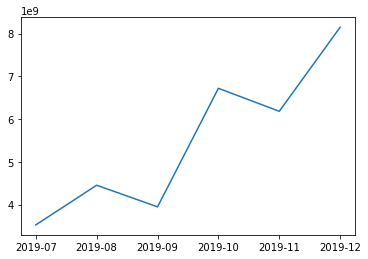

In [5]:
import matplotlib.pyplot as plt
plt.plot(monthly_amount['order_month'], monthly_amount['gmv'])
plt.show()

## Cara Alternatif: Fungsi .plot() pada pandas Dataframe

<function matplotlib.pyplot.show(*args, **kw)>

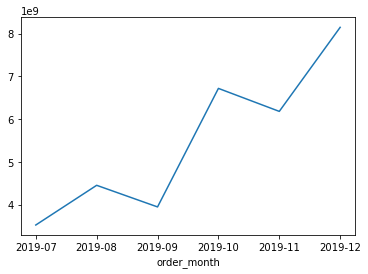

In [6]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show

# Kustomisasi Grafik

## Anatomi dari Figure

<img src ="https://matplotlib.org/3.1.3/_images/sphx_glr_anatomy_001.png" width = '500' height = '500'>

Ada beberapa istilah dan komponen di sebuah plot, nanti akan mempermudah mengingat function apa yang digunakan untuk memodifikasinya.

* __Figure__ adalah keseluruhan visualisasi yang kita 
plot dalam 1 kali menjalankan code.
* Sedangkan satu plot (yang dibuat saat memanggil .plot() atau .scatter()) disebut __Axes__. Sebuah Figure bisa terdiri dari beberapa Axes.
* Setiap Axes biasanya memiliki sumbu-X (__X-axis__) dan sumbu-Y (__Y-axis__). Masing-masing sumbu memiliki komponen sebagai berikut:

    1. __Axis Label__: Nama dari sumbu yang ditampilkan.
    2. __Tick__: Penanda berupa titik/garis kecil yang berjajar di sumbu, sebagai referensi skala nilai.
    3. __Tick Label__: Tulisan di tiap tick yang menyatakan nilainya.
    
    
* Untuk isi grafiknya sendiri, bisa berupa __line__ (untuk line plot), atau __marker__ (untuk scatter plot), bisa juga bentuk lain seperti __bar__ (untuk bar plot / histogram).
* Aksesoris lain yang bisa ditambahkan, diantaranya __Grid__ untuk mempermudah melihat tick yang sejajar, dan __Text__ untuk memberikan informasi tambahan berbentuk teks di grafik. 

Memahami komponen-komponen di atas sudah cukup untuk melakukan berbagai visualisasi dengan matplotlib. Untuk anatomi yang lebih lengkap, bisa dilihat di link berikut: https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html. 

<img scr = "https://matplotlib.org/3.1.3/gallery/showcase/anatomy.html"/>

## Mengubah Figure Size

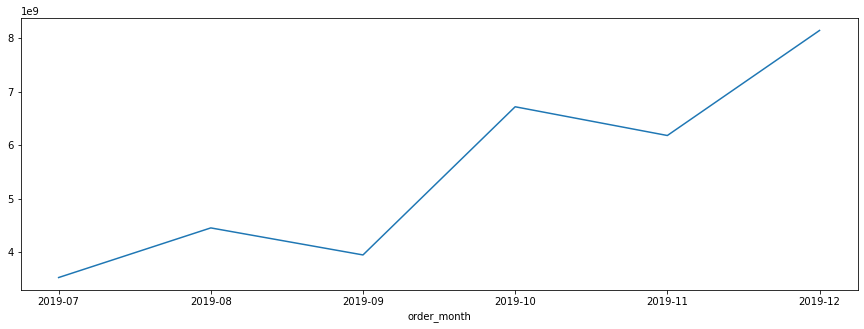

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.show()

## Menambahkan Title and Axis Labels

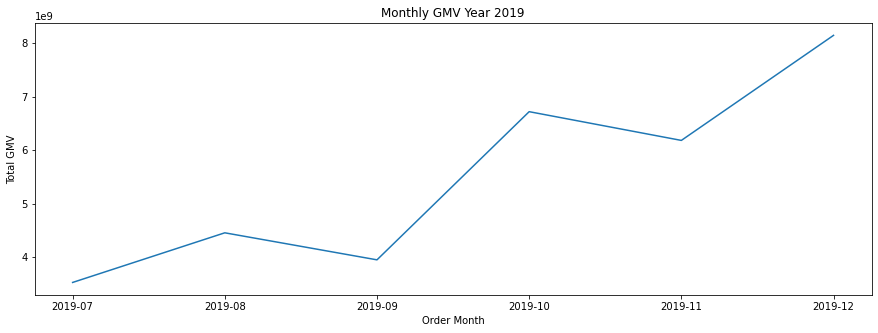

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019')
plt.xlabel('Order Month')
plt.ylabel('Total GMV')
plt.show()

### Kustomisasi Title and Axis Labels
Kita bisa melakukan berbagai modifikasi dengan menambahkan parameter ke dalam function-nya.

Misalnya, untuk __judul/title__, parameter yang bisa ditambahkan:
* __loc__: digunakan untuk menentukan posisi title, misalnya ‘left’ untuk membuat rata kiri, ‘right’ untuk rata kanan, dan ‘center’ untuk meletakkannya di tengah. Jika tidak didefinisikan,maka defaultnya title ada di tengah.
* __pad__: digunakan untuk menambahkan jarak antara judul ke grafik (dalam satuan px), misalnya kita tidak ingin judulnya terlalu menempel dengan grafiknya, jadi kita beri jarak.
* __fontsize__: digunakan untuk mengganti ukuran font/huruf (dalam satuan px). 
* __color__: digunakan untuk mengganti warna huruf judul. Kita bisa menggunakan warna dasar dengan kata seperti ‘blue’, ‘red’, ‘orange’, dsb. Bisa juga dengan hex string, misalnya ‘#42DDF5’ untuk warna biru muda.

Untuk __xlabel__ dan __ylabel__, kita bisa mengganti fontsize dan color, 
tetapi tidak bisa mengganti loc.

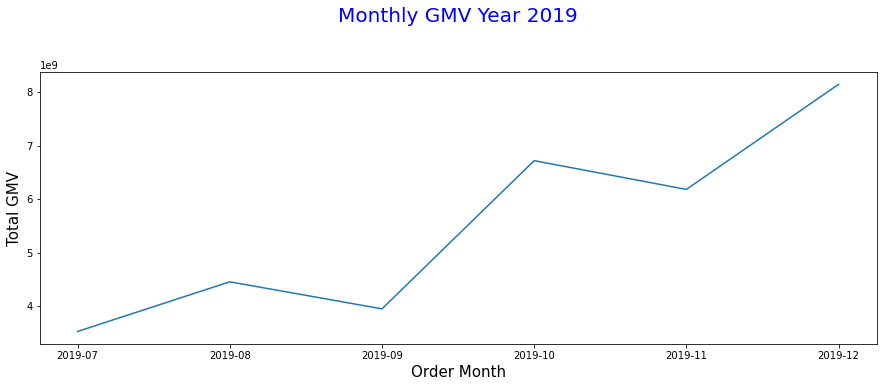

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
dataset.groupby(['order_month'])['gmv'].sum().plot()
plt.title('Monthly GMV Year 2019', loc='center', pad=50, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV', fontsize=15)
plt.show()

### Kostumisasi Line dan Point

Untuk mengubah style dari garis maupun titik di chart, cukup
dengan menambahkan parameter di function .plot(). Beberapa
parameter yang bisa dikustomisasi:
* __color__: mengubah warnanya (sama seperti di title)
* __linewidth__: mengubah ketebalan line/garisnya (dalam satuan px)
* __linestyle__: mengubah jenis dari garis. Misalnya ‘-’ atau ‘solid’ untuk garis tak terputus (seperti pada default), ‘ — ‘ atau ‘dashed’ untuk garis putusputus, ‘:’ atau ‘dotted’ untuk garis berupa titik-titik, bisa juga ‘-.’ atau ‘dashdot’ untuk garis dan titik bergantian.
* __marker__: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untukmarker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’. 

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:
* __color__: mengubah warnanya (sama seperti di title)
* __linewidth__: mengubah ketebalan line/garisnya (dalam satuan px)
* __linestyle__: mengubah jenis dari garis. Misalnya ‘-’ atau ‘solid’ untuk garis tak terputus (seperti pada default), ‘ — ‘ atau ‘dashed’ untuk garis putusputus, ‘:’ atau ‘dotted’ untuk garis berupa titik-titik, bisa juga ‘-.’ atau ‘dashdot’ untuk garis dan titik bergantian.
* __marker__: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’. 

Untuk mengubah style dari garis maupun titik di chart, cukup dengan menambahkan parameter di function .plot(). Beberapa parameter yang bisa dikustomisasi:
* __color__: mengubah warnanya (sama seperti di title)
* __linewidth__: mengubah ketebalan line/garisnya (dalam satuan px)
* __linestyle__: mengubah jenis dari garis. Misalnya ‘-’ atau ‘solid’ untuk garis tak terputus (seperti pada default), ‘ — ‘ atau ‘dashed’ untuk garis putusputus, ‘:’ atau ‘dotted’ untuk garis berupa titik-titik, bisa juga ‘-.’ atau ‘dashdot’ untuk garis dan titik bergantian.
* __marker__: mengubah tipe points/titik data di chart. Ada banyak sekali kemungkinan nilai untuk marker ini, yang biasanya digunakan yaitu ‘.’ untuk bulatan kecil/titik, ‘o’ untuk bulatan agak besar, ‘s’ untuk persegi, ‘D’ untuk diamond/wajik, dan bentuk-bentuk lain seperti ‘+’, ‘x’, ‘|’, ‘*’.

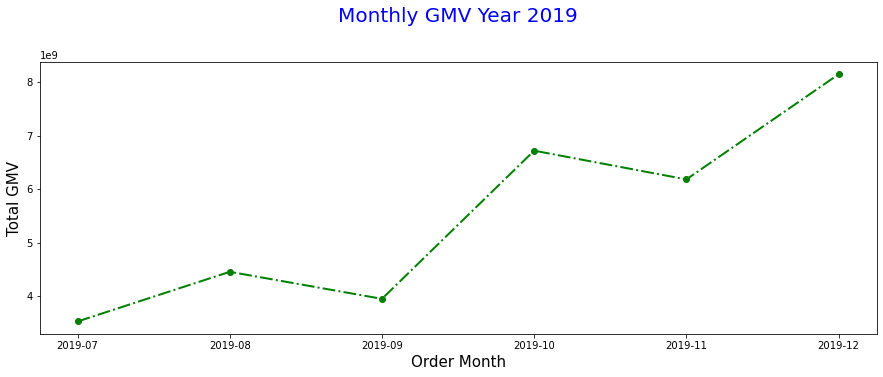

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.show()

### Kostumisasi Grid

Caranya dengan menambahkan plt.grid() dengan parameter yang
mirip dengan line. Contohnya di sini:

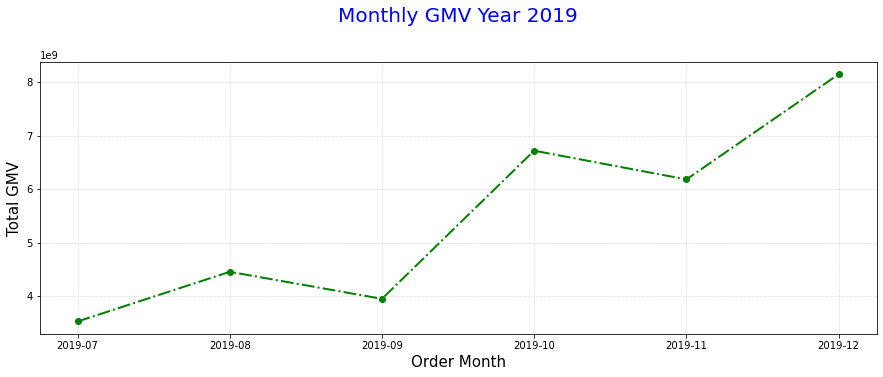

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.show()

### Kostumisasi Axis Ticks

Nilai-nilai di sumbu x dan y bisa diakses melalui function __plt.xticks()__ dan __plt.yticks()__.

Untuk mengubah ticks di sumbu-y menjadi milyar, bisa menambahkan code sebagai berikut:

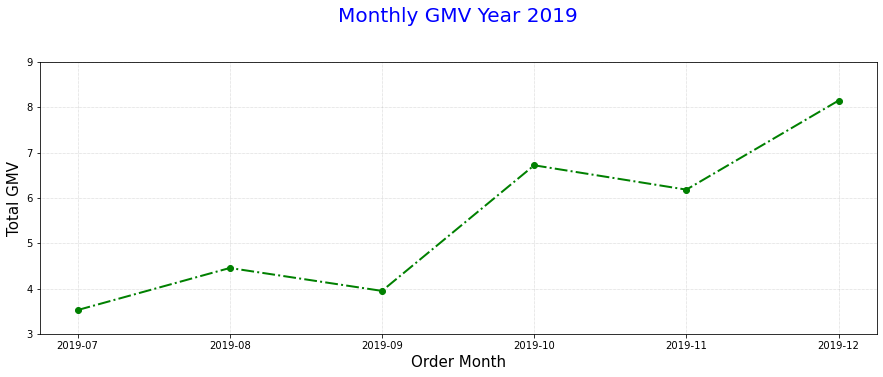

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
labels, locations = plt.yticks()
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

Dapat dilihat bahwa plt.ticks() yang sebelumnya, digantikan
dengan nilai baru yaitu nilai awal dibagi dengan 1 milyar
(1000000000).

### Menentukan Batas Minimum dan Maksimum Axis Ticks

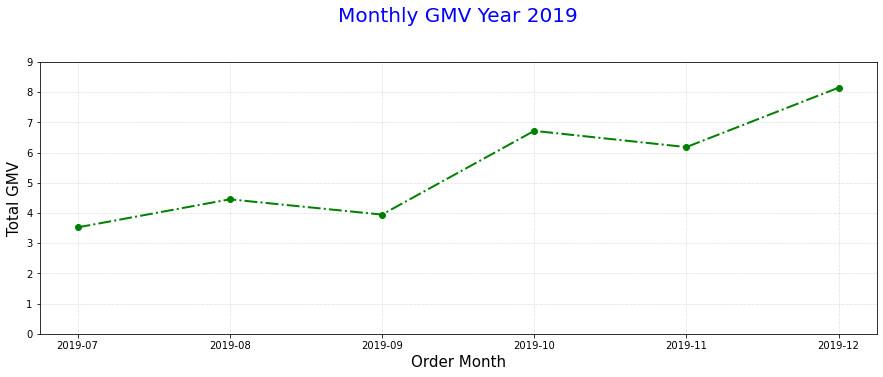

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.show()

### Menambahkan Informasi Pada Plot

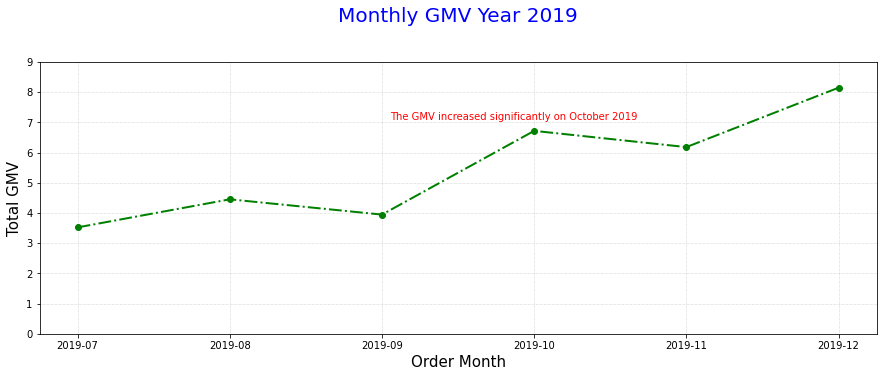

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.show()

### Menyimpan Hasil Plot Menjadi File Image

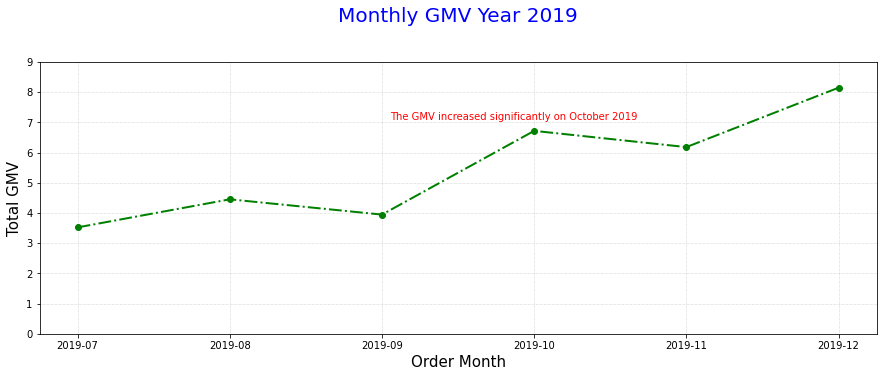

In [15]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png')
plt.show()

### Pengaturan Parameter untuk Menyimpan Gambar

Ada berbagai parameter yang bisa diatur saat menyimpan gambar,
antara lain:
* __dpi__: Resolusi gambar (dots per inch).
* __quality__: Kualitas gambar (hanya berlaku jika formatnya jpg atau jpeg), bisa diisi nilai 1 (paling buruk) hingga 95 (paling bagus).
* __facecolor__: Memberikan warna bagian depan figure, di luar area plot
* __edgecolor__: Memberikan warna pinggiran gambar
* __transparent__: Jika nilainya True, maka gambarnya jadi transparan (jika filenya png) 

Tapi biasanya, parameter-parameter ini tidak digunakan karena grafik di file gambar bisa jadi berbeda dengan yang muncul saat menjalankan code di python.

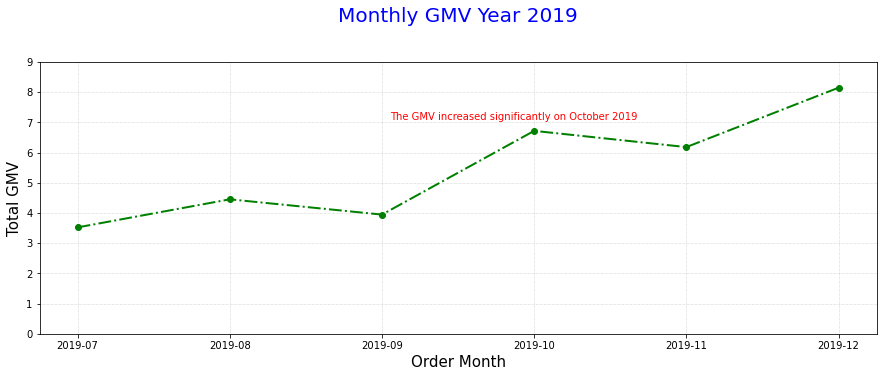

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,5))
dataset.groupby(['order_month'])['gmv'].sum().plot(color = 'green', marker = 'o', linestyle = '-.', linewidth = 2)
plt.title('Monthly GMV Year 2019', loc = 'center', pad = 40, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total GMV', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.text(0.45, 0.72, 'The GMV increased significantly on October 2019', transform=fig.transFigure, color='red')
plt.savefig('monthly_gmv.png', quality=95)
plt.show()

### Mengenal Jenis-Jenis Visualisasi Data dan Tujuannya

Ada banyak sekali jenis visualisasi data, dari yang sederhana
hingga yang kompleks. Setiap jenis visualisasi biasanya lebih tepat
digunakan untuk suatu tujuan tertentu. Secara garis besar, ada
empat tujuan visualisasi yang disampaikan oleh Andrew Abela
sesuai gambar berikut.

Berikut penjelasannya:
1. Perbandingan/Komparasi; jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan barchart.
2. Distribusi; bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.
3. Komposisi; digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.
4. Keterhubungan/Relasi; ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.

## Membuat Multi-line Chart dan Kustomisasi Lanjutan
### Membuat Multi=Line Chart

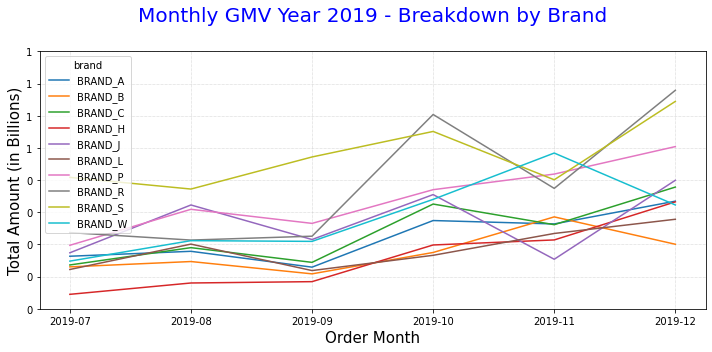

In [17]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc = 'center', pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Kostumisasi Legend

Beberapa parameter yang bisa ditambahkan untuk legend:
* __loc__: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
    1. ‘upper left’, ‘upper right’, ‘lower left’, ‘lower right’:legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
    2. ‘upper center’, ‘lower center’, ‘center left’, ‘center right’: legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
    3. ‘center’: legend diletakkan di tengah-tengah axes
    4. ‘best’: matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
* __bbox_to_anchor__: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
* __shadow__: jika diisi True, maka kotak legend akan
memiliki bayangan.
* __ncol__: jumlah kolom dari isi legend, defaultnya adalah 1
* __fontsize__: ukuran huruf pada legend
* __title__: memberikan judul pada legend
* __title_fontsize__: ukuran huruf pada judul legend


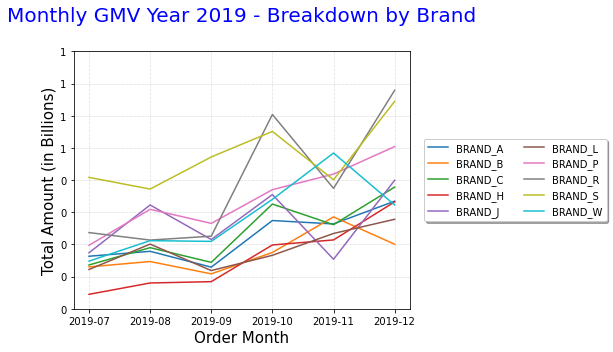

In [18]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc = 'center', pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc = 'right', bbox_to_anchor = (1.6, 0.5), shadow = True, ncol = 2)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

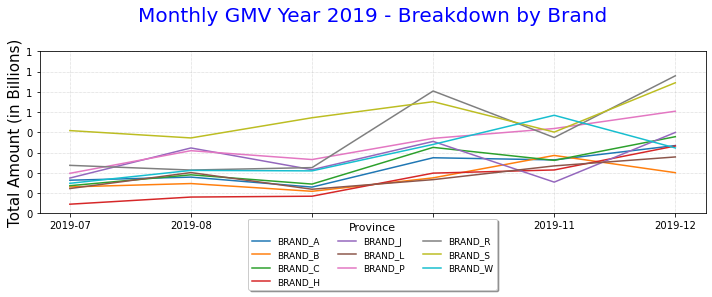

In [19]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc = 'center', pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc = 'lower center',
           bbox_to_anchor = (0.5, -0.5),
           shadow = True, ncol = 3,
           title = 'Province',
           fontsize = 9, title_fontsize = 11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

### Membuat Line Chart GMV Breakdown by Top Provinces

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


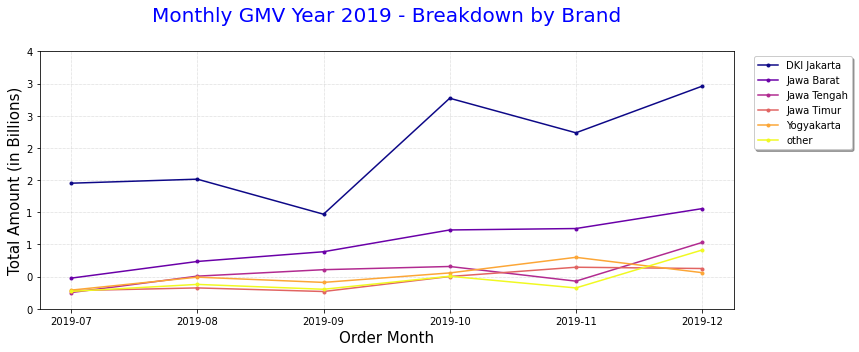

In [20]:
# Buat variabel untuk 5 provinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by = 'gmv', ascending = False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province']
                                             .to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker = '.', cmap = 'plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc = 'center', pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc = 'upper center', bbox_to_anchor = (1.1, 1), shadow = True, ncol = 1)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Membuat Anotasi
Anotasi itu mirip seperti teks, hanya saja ada suatu titik tertentu yang kita tunjuk untuk diberikan informasi tambahan. Selain itu, kita bisa menambahkan panah melalui anotasi.
Untuk membuat annotate, gunakan function plt.annotate. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.
Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:
* __xytext__: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua) 
* __arrowprops__:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
* __arrowstyle__: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti ‘->’, ‘-|>’, ‘<->’, ‘-[‘, dsb. Bisa juga berupa tulisan seperti ‘fancy’, ‘simple’, ‘wedge’, etc.
* __connectionstyle__: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya ‘arc’ dan ‘arc3’ yang berupa garis lurus, ‘angle’ untuk garis berbelok siku, ‘angle3’ untuk garis berbelok lengkung, atau ‘bar’ untuk berbelok siku dua kali.
* __color__: menentukan warna dari panah

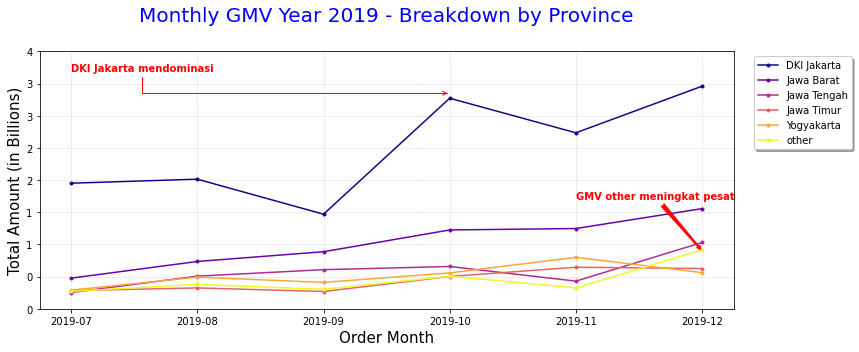

In [21]:
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker = '.', cmap = 'plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc = 'center', pad = 30, fontsize = 20, color = 'blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color = 'darkgrey', linestyle = ':', linewidth = 0.5)
plt.ylim(ymin = 0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc = 'upper center', bbox_to_anchor = (1.1, 1), shadow = True, ncol = 1)
# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy = (5,900000000),
       xytext = (4, 1700000000), weight = 'bold', color = 'red',
       arrowprops = dict(arrowstyle = 'fancy',
               connectionstyle = 'arc3',
               color = 'red'))
# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy = (3, 3350000000),
       xytext = (0, 3700000000), weight = 'bold', color = 'red',
       arrowprops = dict(arrowstyle = '->',
               connectionstyle = 'angle',
               color = 'red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

## Membuat Pie-Chart dan Bar-Chart
### Membuat Subset Data

Misalnya dari data sebelumnya, kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru.

In [22]:
dataset_dki_q4 = dataset[(dataset['province']== 'DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


### Membuat Pie Chart

Misalnya __gmv_per_city_q4__, masukkan datanya ke function __plt.pie()__.

Beberapa parameter yang bisa dimodifikasi:
* __labels__: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
* __colors__: array yang berisikan warna untuk masingmasing bagian pie.
* __autopct__: format untuk nilai persentasi yang ditampilkan, bisa berupa string atau function.
* __shadow__: jika diisi True, maka ada bayangan untuk pie chart-nya. Defaultnya adalah False.
* __radius__: jari-jari dari pie-chart

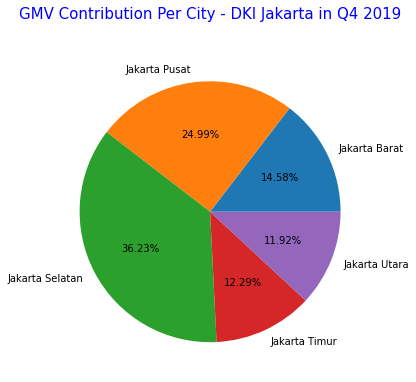

In [23]:
import matplotlib.pyplot as plt
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'], autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.show()

### Membuat Bar Chart

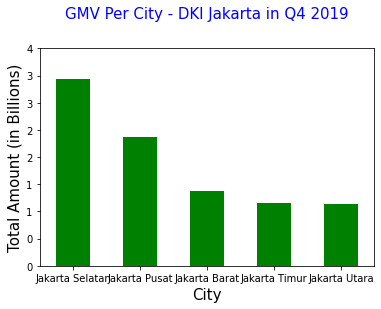

In [24]:
import matplotlib.pyplot as plt
plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('City', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

### Membuat Multi-Bar Chart

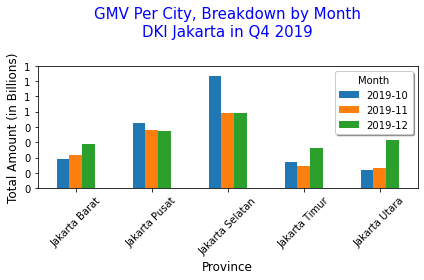

In [25]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019',loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize =12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Membuat Stacked Chart

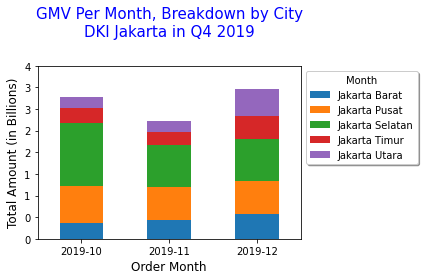

In [26]:
import matplotlib.pyplot as plt
dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar', stacked = True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize = 12)
plt.ylabel('Total Amount (in Billions)', fontsize =12)
plt.legend(bbox_to_anchor=(1, 1), shadow=True, ncol=1, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Membuat Histogram dan Scatterlot
### Membuat Agregat Data Customer

In [27]:
data_per_customer = (dataset_dki_q4.groupby('customer_id').agg({'order_id':'nunique', 'quantity':'sum', 'gmv':'sum'}).reset_index().rename(columns={'order_id':'orders'}))
print(data_per_customer.sort_values(by='orders', ascending = False))

     customer_id  orders  quantity        gmv
0          12748      29       557  175286000
662        17841      26       270  144788000
207        14606      13        25   20714000
25         13089       8       166   93554000
462        16549       8        29   22714000
..           ...     ...       ...        ...
294        15154       1         4    2689000
291        15148       1        12    5400000
289        15121       1         8    2424000
288        15117       1         1    3494000
384        15975       1        42   25410000

[711 rows x 4 columns]


### Membuat Histogram
Dari dataframe baru ini kita bisa melihat persebaran datanya sekaligus untuk masing-masing variabel.
Kita bisa menggunakan function __plt.hist__ dan memasukkan variabel yang ingin dicek. Parameter lain yang bisa ditambahkan yaitu:
* __bins__: jumlah bin (kelompok nilai) yang diinginkan
* __range__: nilai minimum dan maksimum yang ditampilkan
* __orientation__: ‘horizontal’ atau ‘vertikal’
* __color__: warna bar di histogram

<Figure size 432x288 with 0 Axes>

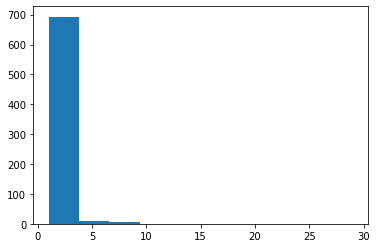

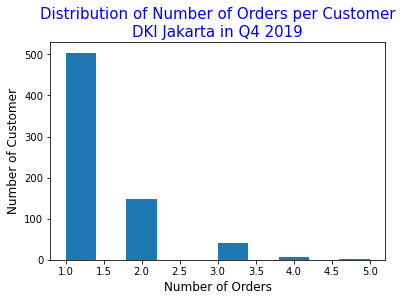

In [28]:
import matplotlib.pyplot as plt
plt.clf()
# Histogram pertama
plt.figure()
plt.hist(data_per_customer['orders'])
plt.show()
# Histogram kedua
plt.figure()
plt.hist(data_per_customer['orders'], range=(1,5))
plt.title('Distribution of Number of Orders per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Number of Orders', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.show()

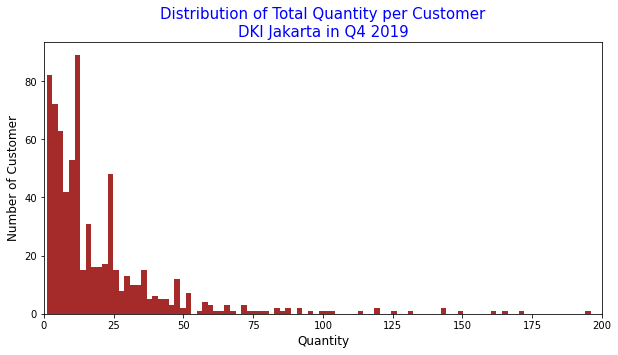

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['quantity'], bins=100, range=(1,200), color='brown')
plt.title('Distribution of Total Quantity per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('Quantity', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.xlim(xmin=0, xmax=200)
plt.show()

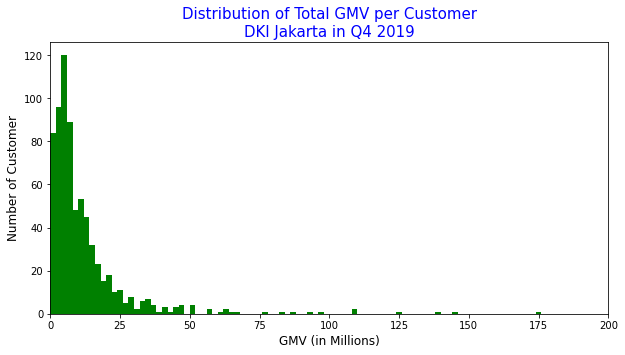

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.hist(data_per_customer['gmv'], bins=100, range=(1,200000000), color='green')
plt.title('Distribution of Total GMV per Customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('GMV (in Millions)', fontsize = 12)
plt.ylabel('Number of Customer', fontsize = 12)
plt.xlim(xmin=0, xmax=200000000)
labels, locations = plt.xticks()
plt.xticks(labels, (labels/1000000).astype(int))
plt.show()

### Membuat Scatterplot
Untuk membuat scatterplot, aku perlu menggunakan function __plt.scatter__ dengan memasukkan variabel-variabel yang akan dibuat scatterplot.

Contoh untuk melihat scatterplot quantity vs GMV:

<Figure size 432x288 with 0 Axes>

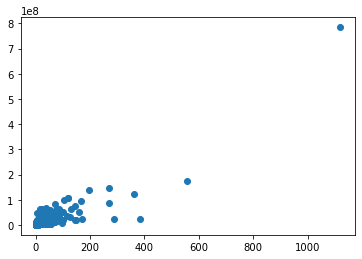

In [31]:
import matplotlib.pyplot as plt
plt.clf()
# Scatterplot pertama
plt.figure()
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'])
plt.show()

Terlihat bahwa memang semakin besar quantity-nya, GMV cenderung semakin tinggi. Tapi masalahnya datanya banyak terkumpul di nilai-nilai kecil, sehingga tidak begitu terlihat detailnya di area situ.

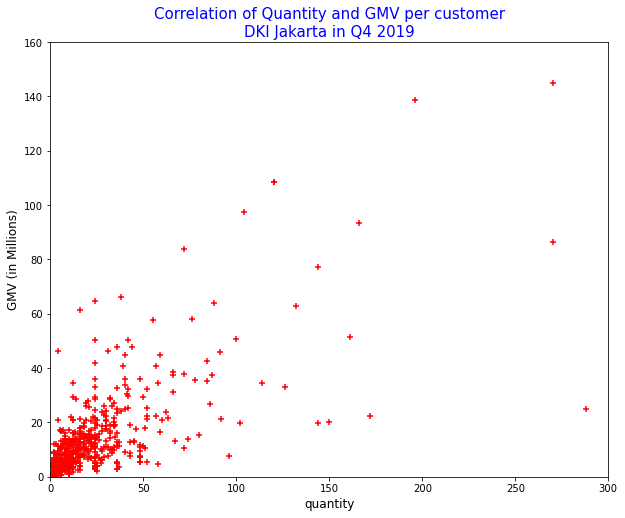

In [32]:
# Scatterplot kedua: perbaikan scatterplot pertama
plt.figure(figsize=(10,8))
plt.scatter(data_per_customer['quantity'], data_per_customer['gmv'], marker='+', color='red')
plt.title('Correlation of Quantity and GMV per customer\nDKI Jakarta in Q4 2019', fontsize=15, color='blue')
plt.xlabel('quantity', fontsize = 12)
plt.ylabel('GMV (in Millions)', fontsize = 12)
plt.xlim(xmin=0, xmax=300)
plt.ylim(ymin=0, ymax=150000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))
plt.show()

Di sini semakin jelas bahwa quantity dan GMV itu berkorelasi positif. Jadi jika suatu customer telah membeli dengan banyak quantity, maka kemungkinan GMV dari dia juga semakin besar.


Sumber: Visualisasi Data Dengan Matplotlib | by Diko Hary Adhanto | From Zero to Data Science | 
Medium 